🍽️ AI MENU RECOMMENDER SYSTEM
📊 Loaded 19 menu items
🍛 Main dishes: 7
🥗 Side dishes: 6
🥤 Drinks: 6

📋 MENU DATASET:
           item_name category  calories taste_profile  popularity_score
Paneer Butter Masala     main       450         spicy              0.90
     Chicken Biryani     main       600         spicy              0.95
     Vegetable Pulao     main       400        savory              0.70
        Rajma Chawal     main       500        savory              0.80
       Chole Bhature     main       650         spicy              0.85
         Masala Dosa     main       480        savory              0.88
    Grilled Sandwich     main       370        savory              0.60
         Garlic Naan     side       200        savory              0.90
     Mixed Veg Salad     side       150         sweet              0.75
        French Fries     side       350        savory              0.80
           Curd Rice     side       250        savory              0.70
               Papad

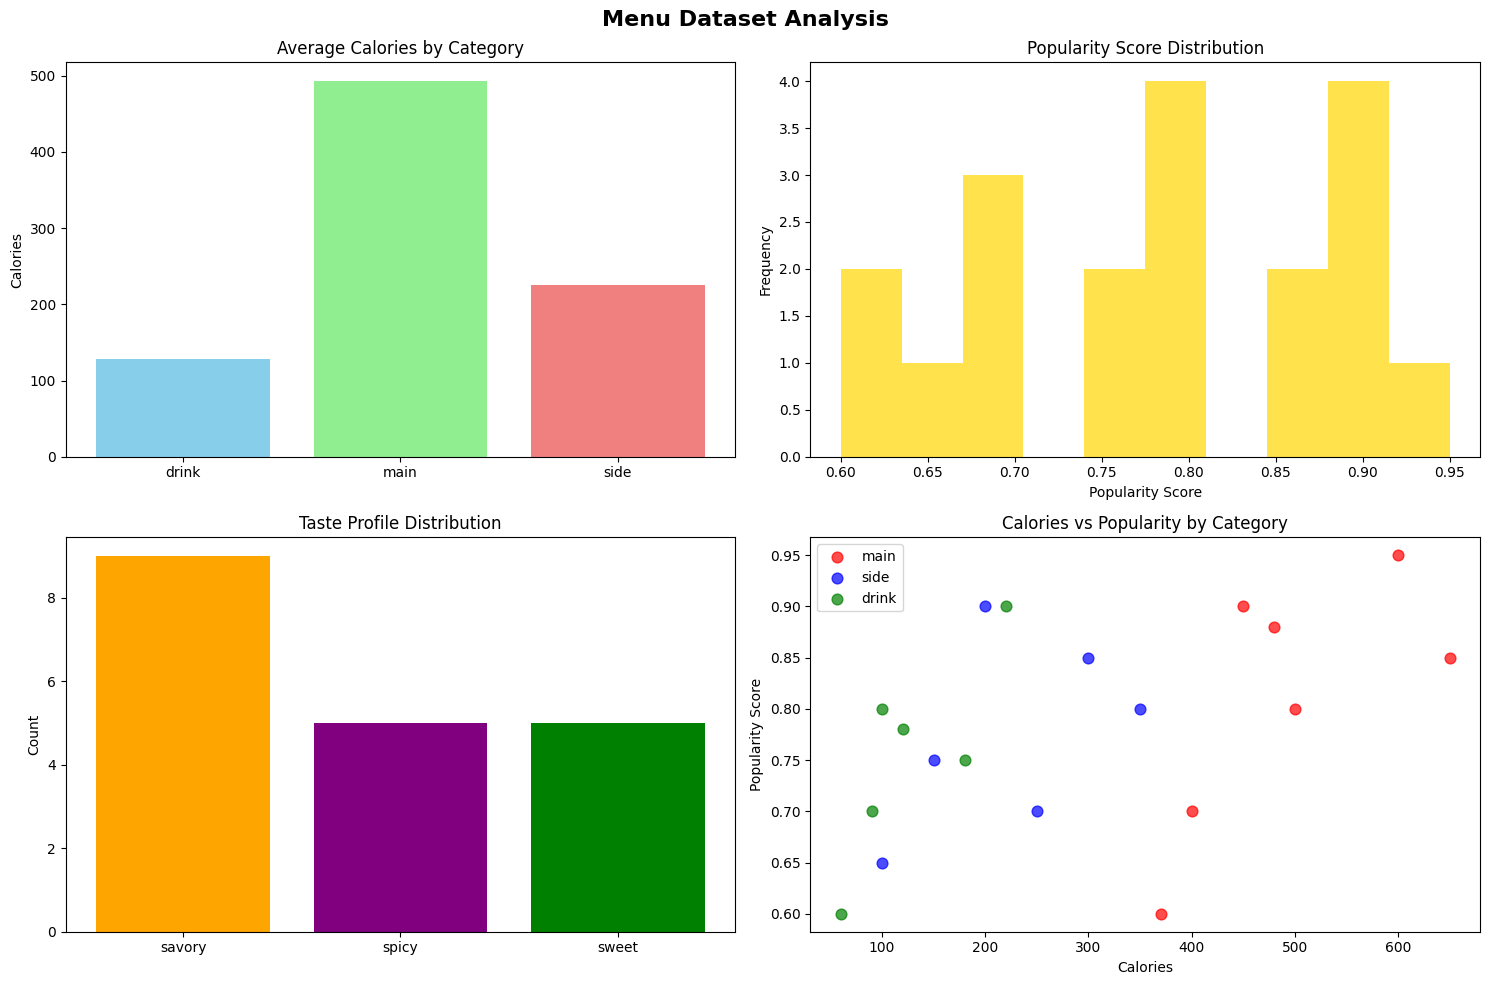


🎯 GENERATING RECOMMENDATIONS...
🔄 Generating all possible combinations...
✅ Generated 252 total combinations
📊 121 combinations meet the criteria

🍽️  3-DAY MENU RECOMMENDATIONS

📅 DAY 1
----------------------------------------
🍛 MAIN: Paneer Butter Masala (spicy) - 450 cal
🥗 SIDE: Garlic Naan (savory) - 200 cal
🥤 DRINK: Iced Tea (sweet) - 120 cal
📊 TOTAL CALORIES: 770
⭐ AVERAGE POPULARITY: 0.86
🎨 TASTE DIVERSITY: 3 different profiles
🏆 COMBO SCORE: 1.228

📅 DAY 2
----------------------------------------
🍛 MAIN: Chole Bhature (spicy) - 650 cal
🥗 SIDE: Papad (savory) - 100 cal
🥤 DRINK: Coconut Water (sweet) - 60 cal
📊 TOTAL CALORIES: 810
⭐ AVERAGE POPULARITY: 0.70
🎨 TASTE DIVERSITY: 3 different profiles
🏆 COMBO SCORE: 1.200

📅 DAY 3
----------------------------------------
🍛 MAIN: Chicken Biryani (spicy) - 600 cal
🥗 SIDE: Mixed Veg Salad (sweet) - 150 cal
🥤 DRINK: Lemon Soda (savory) - 90 cal
📊 TOTAL CALORIES: 840
⭐ AVERAGE POPULARITY: 0.80
🎨 TASTE DIVERSITY: 3 different profiles
🏆 COM

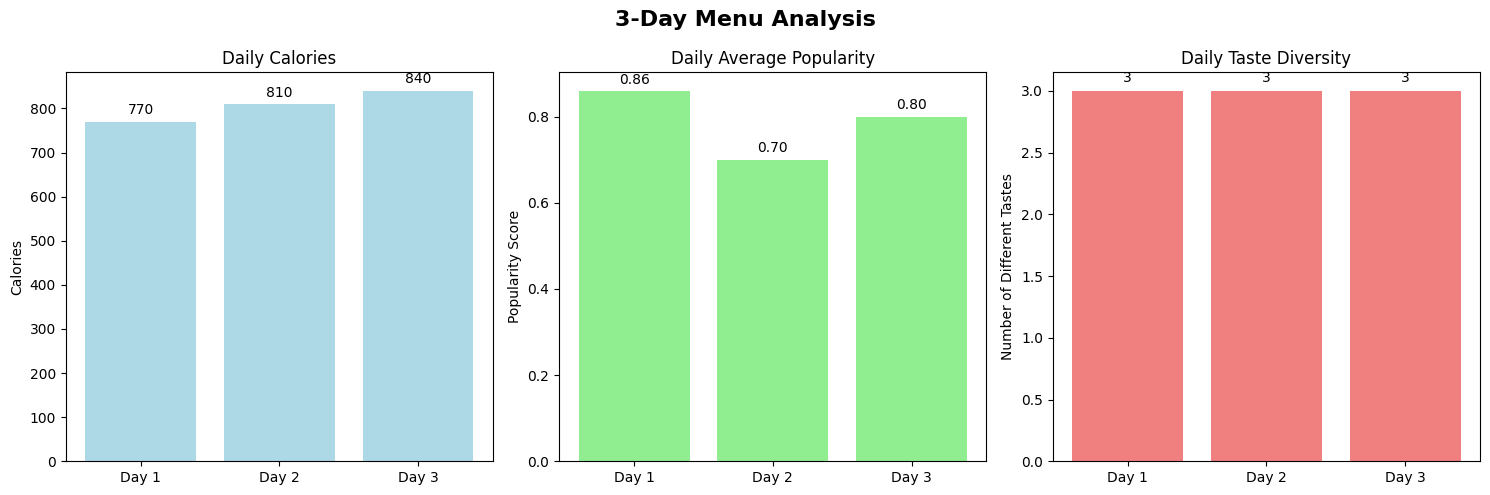


📋 RECOMMENDATIONS DATAFRAME:
                main            side         drink  total_calories  avg_popularity  taste_diversity  combo_score
Paneer Butter Masala     Garlic Naan      Iced Tea             770            0.86                3        1.228
       Chole Bhature           Papad Coconut Water             810            0.70                3        1.200
     Chicken Biryani Mixed Veg Salad    Lemon Soda             840            0.80                3        1.200

✅ Analysis complete!


In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Recommender Class
class MenuRecommender:
    def __init__(self, data):
        self.data = data
        self.main_items = data[data['category'] == 'main']
        self.side_items = data[data['category'] == 'side']
        self.drink_items = data[data['category'] == 'drink']

    def calculate_combo_score(self, main, side, drink):
        total_calories = main['calories'] + side['calories'] + drink['calories']
        avg_popularity = (main['popularity_score'] + side['popularity_score'] + drink['popularity_score']) / 3
        taste_profiles = {main['taste_profile'], side['taste_profile'], drink['taste_profile']}
        taste_diversity = len(taste_profiles)
        combo_score = avg_popularity * taste_diversity * 0.1 + (1000 - abs(total_calories - 800)) * 0.001

        return {
            'total_calories': total_calories,
            'avg_popularity': avg_popularity,
            'taste_diversity': taste_diversity,
            'combo_score': combo_score
        }

    def generate_all_combos(self):
        combos = []
        for _, main in self.main_items.iterrows():
            for _, side in self.side_items.iterrows():
                for _, drink in self.drink_items.iterrows():
                    combo_info = self.calculate_combo_score(main, side, drink)
                    combos.append({
                        'main': main['item_name'],
                        'main_taste': main['taste_profile'],
                        'main_calories': main['calories'],
                        'main_popularity': main['popularity_score'],
                        'side': side['item_name'],
                        'side_taste': side['taste_profile'],
                        'side_calories': side['calories'],
                        'side_popularity': side['popularity_score'],
                        'drink': drink['item_name'],
                        'drink_taste': drink['taste_profile'],
                        'drink_calories': drink['calories'],
                        'drink_popularity': drink['popularity_score'],
                        **combo_info
                    })
        return pd.DataFrame(combos)

    def recommend_3_day_menu(self, calorie_range=(700, 900), min_popularity=0.7, ensure_diversity=True):
        print("🔄 Generating all possible combinations...")
        all_combos = self.generate_all_combos()
        print(f"✅ Generated {len(all_combos)} total combinations")

        filtered_combos = all_combos[
            (all_combos['total_calories'] >= calorie_range[0]) &
            (all_combos['total_calories'] <= calorie_range[1]) &
            (all_combos['avg_popularity'] >= min_popularity)
        ].copy()

        print(f"📊 {len(filtered_combos)} combinations meet the criteria")

        if len(filtered_combos) < 3:
            print("⚠️ Not enough combinations meet the criteria. Relaxing constraints...")
            filtered_combos = all_combos.nlargest(10, 'combo_score')

        filtered_combos = filtered_combos.sort_values('combo_score', ascending=False)

        selected_combos = []
        used_items = set()

        for _, combo in filtered_combos.iterrows():
            combo_items = {combo['main'], combo['side'], combo['drink']}
            if ensure_diversity and combo_items.intersection(used_items):
                continue
            selected_combos.append(combo)
            used_items.update(combo_items)
            if len(selected_combos) == 3:
                break

        while len(selected_combos) < 3 and len(filtered_combos) > len(selected_combos):
            combo = filtered_combos.iloc[len(selected_combos)]
            selected_combos.append(combo)

        return selected_combos

    def display_recommendations(self, recommendations):
        print("\n" + "="*80)
        print("🍽️  3-DAY MENU RECOMMENDATIONS")
        print("="*80)

        total_calories = []
        total_popularity = []

        for i, combo in enumerate(recommendations, 1):
            print(f"\n📅 DAY {i}")
            print("-" * 40)
            print(f"🍛 MAIN: {combo['main']} ({combo['main_taste']}) - {combo['main_calories']} cal")
            print(f"🥗 SIDE: {combo['side']} ({combo['side_taste']}) - {combo['side_calories']} cal")
            print(f"🥤 DRINK: {combo['drink']} ({combo['drink_taste']}) - {combo['drink_calories']} cal")
            print(f"📊 TOTAL CALORIES: {combo['total_calories']}")
            print(f"⭐ AVERAGE POPULARITY: {combo['avg_popularity']:.2f}")
            print(f"🎨 TASTE DIVERSITY: {combo['taste_diversity']} different profiles")
            print(f"🏆 COMBO SCORE: {combo['combo_score']:.3f}")

            total_calories.append(combo['total_calories'])
            total_popularity.append(combo['avg_popularity'])

        print("\n" + "="*80)
        print("📈 SUMMARY STATISTICS")
        print("="*80)
        print(f"📊 Calorie Range: {min(total_calories)} - {max(total_calories)} calories")
        print(f"📊 Average Calories: {np.mean(total_calories):.0f} calories")
        print(f"⭐ Popularity Range: {min(total_popularity):.2f} - {max(total_popularity):.2f}")
        print(f"⭐ Average Popularity: {np.mean(total_popularity):.2f}")

        return pd.DataFrame(recommendations)

    def plot_analysis(self):
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        fig.suptitle('Menu Dataset Analysis', fontsize=16, fontweight='bold')

        cat_calories = self.data.groupby('category')['calories'].mean()
        axes[0,0].bar(cat_calories.index, cat_calories.values, color=['skyblue', 'lightgreen', 'lightcoral'])
        axes[0,0].set_title('Average Calories by Category')
        axes[0,0].set_ylabel('Calories')

        axes[0,1].hist(self.data['popularity_score'], bins=10, color='gold', alpha=0.7)
        axes[0,1].set_title('Popularity Score Distribution')
        axes[0,1].set_xlabel('Popularity Score')
        axes[0,1].set_ylabel('Frequency')

        taste_counts = self.data['taste_profile'].value_counts()
        axes[1,0].bar(taste_counts.index, taste_counts.values, color=['orange', 'purple', 'green'])
        axes[1,0].set_title('Taste Profile Distribution')
        axes[1,0].set_ylabel('Count')

        colors = {'main': 'red', 'side': 'blue', 'drink': 'green'}
        for category in self.data['category'].unique():
            cat_data = self.data[self.data['category'] == category]
            axes[1,1].scatter(cat_data['calories'], cat_data['popularity_score'], 
                              c=colors[category], label=category, alpha=0.7, s=60)

        axes[1,1].set_title('Calories vs Popularity by Category')
        axes[1,1].set_xlabel('Calories')
        axes[1,1].set_ylabel('Popularity Score')
        axes[1,1].legend()

        plt.tight_layout()
        plt.show()

    def plot_recommendations(self, recommendations_df):
        if len(recommendations_df) == 0:
            print("No recommendations to plot!")
            return

        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        fig.suptitle('3-Day Menu Analysis', fontsize=16, fontweight='bold')

        days = [f'Day {i+1}' for i in range(len(recommendations_df))]

        axes[0].bar(days, recommendations_df['total_calories'], color='lightblue')
        axes[0].set_title('Daily Calories')
        axes[0].set_ylabel('Calories')
        for i, v in enumerate(recommendations_df['total_calories']):
            axes[0].text(i, v + 10, str(int(v)), ha='center', va='bottom')

        axes[1].bar(days, recommendations_df['avg_popularity'], color='lightgreen')
        axes[1].set_title('Daily Average Popularity')
        axes[1].set_ylabel('Popularity Score')
        for i, v in enumerate(recommendations_df['avg_popularity']):
            axes[1].text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom')

        axes[2].bar(days, recommendations_df['taste_diversity'], color='lightcoral')
        axes[2].set_title('Daily Taste Diversity')
        axes[2].set_ylabel('Number of Different Tastes')
        for i, v in enumerate(recommendations_df['taste_diversity']):
            axes[2].text(i, v + 0.05, str(int(v)), ha='center', va='bottom')

        plt.tight_layout()
        plt.show()


# Sample Dataset
def load_menu_data():
    data = {
        'item_name': ['Paneer Butter Masala', 'Chicken Biryani', 'Vegetable Pulao', 'Rajma Chawal', 
                     'Chole Bhature', 'Masala Dosa', 'Grilled Sandwich', 'Garlic Naan', 'Mixed Veg Salad',
                     'French Fries', 'Curd Rice', 'Papad', 'Paneer Tikka', 'Masala Chaas', 'Sweet Lassi',
                     'Lemon Soda', 'Cold Coffee', 'Coconut Water', 'Iced Tea'],
        'category': ['main', 'main', 'main', 'main', 'main', 'main', 'main', 'side', 'side',
                    'side', 'side', 'side', 'side', 'drink', 'drink', 'drink', 'drink', 'drink', 'drink'],
        'calories': [450, 600, 400, 500, 650, 480, 370, 200, 150, 350, 250, 100, 300, 100, 220, 90, 180, 60, 120],
        'taste_profile': ['spicy', 'spicy', 'savory', 'savory', 'spicy', 'savory', 'savory', 'savory', 'sweet',
                         'savory', 'savory', 'savory', 'spicy', 'spicy', 'sweet', 'savory', 'sweet', 'sweet', 'sweet'],
        'popularity_score': [0.9, 0.95, 0.7, 0.8, 0.85, 0.88, 0.6, 0.9, 0.75, 0.8, 0.7, 0.65, 0.85, 0.8, 0.9, 0.7, 0.75, 0.6, 0.78]
    }
    return pd.DataFrame(data)


# Main Execution
if __name__ == "__main__":
    print("🍽️ AI MENU RECOMMENDER SYSTEM")
    print("="*50)

    df = load_menu_data()
    print(f"📊 Loaded {len(df)} menu items")
    print(f"🍛 Main dishes: {len(df[df['category'] == 'main'])}")
    print(f"🥗 Side dishes: {len(df[df['category'] == 'side'])}")
    print(f"🥤 Drinks: {len(df[df['category'] == 'drink'])}")

    recommender = MenuRecommender(df)

    print("\n📋 MENU DATASET:")
    print(df.to_string(index=False))

    print("\n📊 Generating dataset analysis plots...")
    recommender.plot_analysis()

    print("\n🎯 GENERATING RECOMMENDATIONS...")
    recommendations = recommender.recommend_3_day_menu(
        calorie_range=(700, 900),
        min_popularity=0.7,
        ensure_diversity=True
    )

    if recommendations:
        rec_df = recommender.display_recommendations(recommendations)
        print("\n📈 Generating recommendation analysis plots...")
        recommender.plot_recommendations(rec_df)

        print("\n📋 RECOMMENDATIONS DATAFRAME:")
        display_cols = ['main', 'side', 'drink', 'total_calories', 'avg_popularity', 'taste_diversity', 'combo_score']
        print(rec_df[display_cols].to_string(index=False))
    else:
        print("❌ Could not generate recommendations with the current criteria.")

    print("\n✅ Analysis complete!")
